Final Project 3 ~ Dimas Rifai Lombu

PYTN-KS01-001

Dataset yang digunakan pada final project 3 yaitu dataset [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) yang terdiri dari 13 kolom dan 299 data dengan atribut sebagai berikut:

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes (0 = non-diabetes, 1 = diabetes)
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (0 = live, 1 = dead)

**Objektif**

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


## Import Library & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import pickle
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Mengecek duplikat pada data

In [7]:
df.duplicated().sum()

0

Mengecek missing value pada data

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Exploratory Data Analysis

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Melihat Perbandingan Banyaknya kematian akibat yang merokok dan tidak merokok

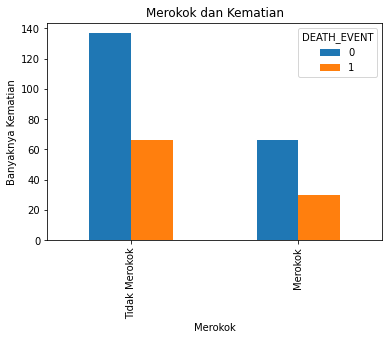

In [10]:
pd.crosstab(df.smoking, df.DEATH_EVENT).plot(kind='bar')
plt.ylabel('Banyaknya Kematian')
plt.xlabel('Merokok')
plt.title('Merokok dan Kematian')
plt.xticks(ticks=(0,1),labels=['Tidak Merokok','Merokok'])
plt.show()

Mengecek nilai outlier pada data

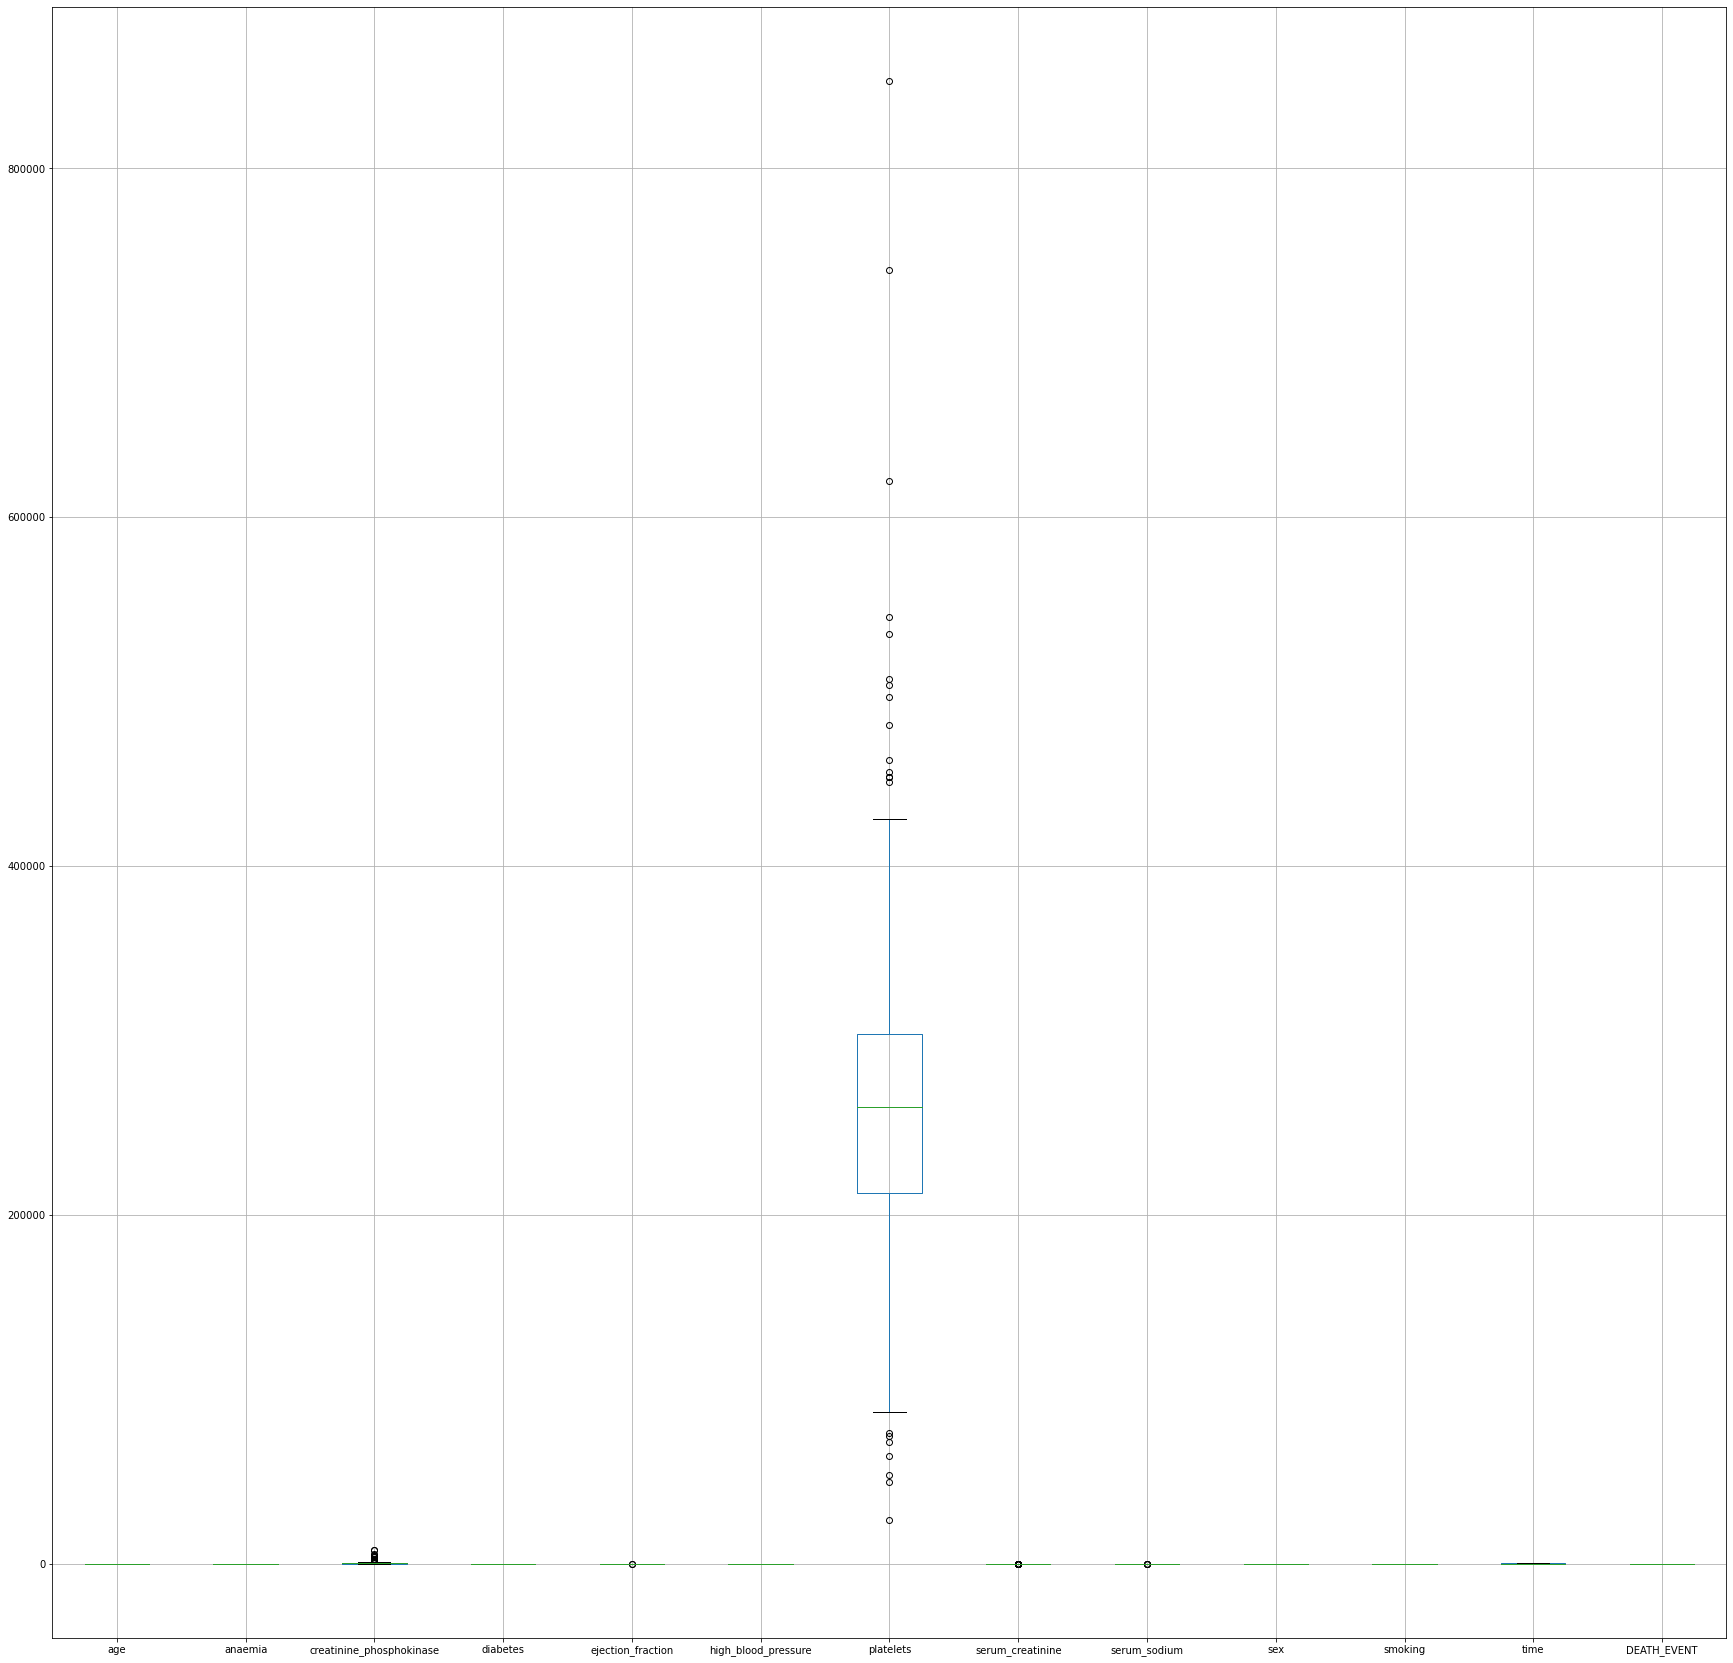

In [11]:
df.boxplot(figsize=(30,30))
plt.show()

In [12]:
clmn = [col for col in df.columns]
clmn

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

Mengatasi nilai outlier dengan IQR

In [13]:
for feature in clmn:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

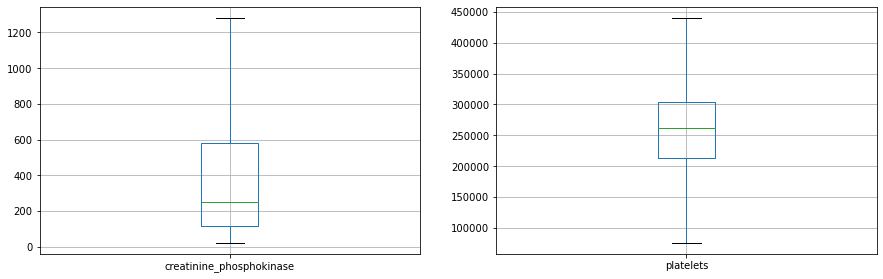

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='creatinine_phosphokinase')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='platelets')

Melihat Perbandingan antara pasien Jantung Kardiovaskular yang hidup dan meninggal 

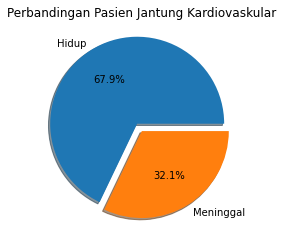

In [15]:
live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

arr = np.array([live, death])
labels = ['Hidup','Meninggal']


plt.pie(arr, labels = labels,explode = [0.1,0.0], shadow = True, autopct='%1.1f%%')
plt.title('Perbandingan Pasien Jantung Kardiovaskular')
plt.show()

Melihat korelasi antar variabel

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.086870,-0.101012,0.066056,0.093289,-0.034159,0.253989,-0.052425,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.214201,-0.012729,0.034259,0.038182,-0.029060,-0.016329,0.048286,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.086870,-0.214201,1.000000,0.011575,-0.044189,-0.077600,-0.012715,-0.077821,0.020806,0.043623,-0.033310,0.114641,-0.006355
diabetes,-0.101012,-0.012729,0.011575,1.000000,-0.001267,-0.012732,0.070419,-0.009790,-0.071714,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.066056,0.034259,-0.044189,-0.001267,1.000000,0.026419,0.068474,-0.168809,0.181716,-0.144435,-0.065217,0.044765,-0.270611
high_blood_pressure,0.093289,0.038182,-0.077600,-0.012732,0.026419,1.000000,0.073361,-0.072465,0.026167,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.034159,-0.029060,-0.012715,0.070419,0.068474,0.073361,1.000000,-0.052139,0.054313,-0.124212,0.012990,-0.003807,-0.044132
serum_creatinine,0.253989,-0.016329,-0.077821,-0.009790,-0.168809,-0.072465,-0.052139,1.000000,-0.293201,0.034192,-0.043262,-0.176060,0.388469
serum_sodium,-0.052425,0.048286,0.020806,-0.071714,0.181716,0.026167,0.054313,-0.293201,1.000000,-0.038217,0.011637,0.085066,-0.201320
sex,0.065430,-0.094769,0.043623,-0.157730,-0.144435,-0.104615,-0.124212,0.034192,-0.038217,1.000000,0.445892,-0.015608,-0.004316


In [17]:
subset_features = corr[abs(corr["DEATH_EVENT"]) > 0.20]["DEATH_EVENT"].index
subset_features

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [18]:
df_new = df.filter(items=subset_features)
df_new.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20.0,1.90,130,4,1.0
1,55.0,38.0,1.10,136,6,1.0
2,65.0,20.0,1.30,129,7,1.0
3,50.0,20.0,1.90,137,7,1.0
4,65.0,20.0,2.15,125,8,1.0


- Diperoleh hasil bahwa jumlah pasien merokok yang meninggal paling sedikit dibandingkan dengan yang lain
- Diperoleh nilai outlier pada beberapa variabel yaitu variabel creatinine_phosphokinase dan platelets
- Nilai outlier pada data ditangani dengan nilai IQR
- Perbandingan antara pasien jantung Kardiovaskular yang bertahan hidup lebih besar daripada yang meninggal 
- Diambil 5 variabel yang memiliki korelasi cukup besar terhadap variabel DEATH_EVENT yaitu variabel age, ejection_fraction, serum_creatinine, dan time.

## Data Preprocessing

In [19]:
X = df_new.drop('DEATH_EVENT', axis = 1)
y = df_new['DEATH_EVENT']

In [20]:
X_train,X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state= 325)

In [21]:
print(f'Jumlah data X_train {X_train.shape}')
print(f'Jumlah data X_test {X_test.shape}')
print(f'Jumlah data y_train {y_train.shape}')
print(f'Jumlah data y_test {y_test.shape}')

Jumlah data X_train (209, 5)
Jumlah data X_test (90, 5)
Jumlah data y_train (209,)
Jumlah data y_test (90,)


In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model Training & Evaluation

In [23]:
rfc = RandomForestClassifier(
    n_jobs=-1, class_weight="balanced")
rfc.fit(X_train, y_train)

y_pred1 = rfc.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        62
         1.0       0.77      0.71      0.74        28

    accuracy                           0.84        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.84      0.84      0.84        90



In [24]:
extra_tree=ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)

y_pred1 = extra_tree.predict(X_test)

# evaluasi model
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        62
         1.0       0.76      0.57      0.65        28

    accuracy                           0.81        90
   macro avg       0.79      0.75      0.76        90
weighted avg       0.81      0.81      0.80        90



In [25]:
xgb1 = XGBClassifier(colsample_bytree = 1.0, 
                    learning_rate = 0.1,
                    max_depth = 4,
                    n_estimators = 4,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds = 10, 
         eval_metric = 'logloss', eval_set = eval_set, 
         verbose = True)

pred = xgb1.predict(X_test)

# evaluasi model
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

[0]	validation_0-logloss:0.64430
[1]	validation_0-logloss:0.60573
[2]	validation_0-logloss:0.57189
[3]	validation_0-logloss:0.54438
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        62
         1.0       0.68      0.68      0.68        28

    accuracy                           0.80        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



In [26]:
pickle.dump(rfc, open('modelfp3.pkl','wb'))

- Terdapat 13 atribut yang diasumsikan memengaruhi variabel **DEATH_EVENT**. Setelah dilakukan analisis, diambil 5 atribut/faktor yang paling berpengaruh dalam model.
- Atribut/faktor yang berpengaruh signifikan terhadap kematian pasien gagal jantung yaitu **age, ejection_fraction, serum_creatinine, serum_sodium, dan time.**
- Berdasarkan ketiga model diperoleh nilai akurasi untuk masing-masing model:
1. Random Forest Classifier nilai akurasinya sebesar 0.83 atau sebesar 83%
2. ExtraTreesClassifier nilai akurasinya sebesar 0.79 atau 79%
3. XGBClassifier nilai akurasinya sebesar 0.80 atau 80%
- Berdasarkan nilai akurasi yang dihasilkan, maka model yang digunakan yaitu **Random Forest Classifier**